In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("E:\\AIML Task\\Titanic-Dataset.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Check the shape of the dataset
df.shape 

(891, 12)

In [ ]:
# drop the 'Name' column as it is not useful for analysis
df.drop(['Name'], axis=1, inplace=True)

In [9]:
df.drop(['Ticket'], axis=1, inplace = True)

In [10]:
df.shape

(891, 10)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [ ]:
# Check for missing values in percentage
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [ ]:
# describe the 'Age' column to understand its distribution and identify potential outliers
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_26832\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
df['Cabin'].describe() # Check the distribution of values in the 'Cabin' column

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [ ]:
df.drop(['Cabin'], axis=1, inplace=True) # Drop the 'Cabin' column due to a high percentage of missing values

In [ ]:
df['Embarked'].describe() #Check the distribution of values in the 'Embarked' column

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) #Fill missing values in 'Embarked' with the most frequent value (mode)

In [20]:
df.isnull().sum() #Check for any remaining missing values after imputation

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [22]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [ ]:
# Identify categorical columns (object type) for encoding
cat_col = df.select_dtypes(
    include='object' 
).columns
print("Categorical columns:", cat_col)

Categorical columns: Index(['Sex', 'Embarked'], dtype='object')


In [23]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables using LabelEncoder
le = LabelEncoder()
df['Sex'] =le.fit_transform(df['Sex'])

In [24]:
df['Sex'].dtypes

dtype('int64')

In [25]:
# One-hot encode the 'Embarked' column using get_dummies
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [26]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked_Q        bool
Embarked_S        bool
dtype: object

In [27]:
# Identify numerical columns (int64 and float64 types) for analysis
num_cols = df.select_dtypes(
    include=['int64', 'float64']
).columns
print("Numerical columns:", num_cols)

Numerical columns: Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')


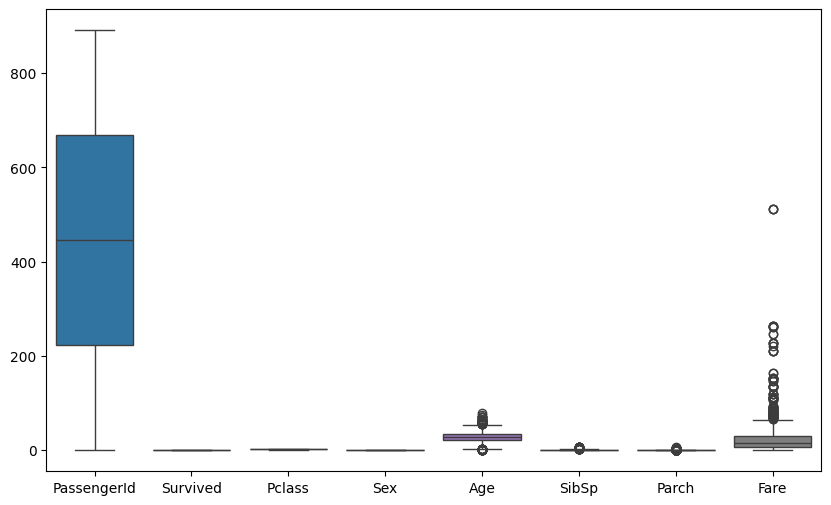

In [ ]:
#Visualize the distribution of numerical features using box plots to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data = df[num_cols])
plt.show()

In [30]:
cols = ['Age', 'SibSp', 'Parch', 'Fare']

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 -Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)
    

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [32]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,-1.730108,-0.789272,0.827377,0.737695,-0.583432,0.810220,0.0,-0.820552,False,True
1,-1.726220,1.266990,-1.566107,-1.355574,0.742685,0.810220,0.0,2.031623,False,False
2,-1.722332,1.266990,0.827377,-1.355574,-0.251903,-0.602512,0.0,-0.787578,False,True
3,-1.718444,1.266990,-1.566107,-1.355574,0.494038,0.810220,0.0,1.419297,False,True
4,-1.714556,-0.789272,0.827377,0.737695,0.494038,-0.602512,0.0,-0.781471,False,True


In [33]:
df.shape

(891, 10)